# **KNN Flags**

In [27]:
import pandas as pd
url = (
"https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data"
)
flags = pd.read_csv(url, header=None)

flags.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


Se utiliza el dataset de banderas e imprimimos las primeras 5 lineas del data set

Le asignamos nombres a las columnas del data set para saber que reprensenta cada una de ellas


In [28]:
flags.columns = [
    "name",
    "landmass",
    "zone",
    "area",
    "population",
    "language",
    "religion",
    "bars",
    "stripes",
    "colours",
    "red",
    "green",
    "blue",
    "gold",
    "white",
    "black",
    "orange",
    "mainhue",
    "circles",
    "crosses",
    "saltires",
    "quarters",
    "sunstars",
    "crescent",
    "triangle",
    "icon",
    "animate",
    "text",
    "topleft",
    "botright",
]

flags.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


Como vamos a tratar de predecir la religion de un pais en base a su tamaño y colores en su bandera, vamos a dropear columnas que no necesitamos

In [29]:
flags = flags.drop("name", axis=1)
flags = flags.drop("landmass", axis=1)
flags = flags.drop("zone", axis=1)
flags = flags.drop("area", axis=1)
flags = flags.drop("population", axis=1)
flags = flags.drop("language", axis=1)
flags = flags.drop("mainhue", axis=1)
flags = flags.drop("topleft", axis=1)
flags = flags.drop("botright", axis=1)


In [30]:
flags.head()

,religion,bars,stripes,colours,red,green,blue,gold,white,black,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,2,0,3,5,1,1,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
1,6,0,0,3,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,2,2,0,3,1,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,1,0,0,5,1,0,1,1,1,0,...,0,0,0,0,0,0,1,1,1,0
4,0,3,0,3,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Ya que la variable de interes aqui es la religion, se genera un histograma para darnos una idea de los rangos entre cada una de ellas.

0=Catholic, 1=Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others

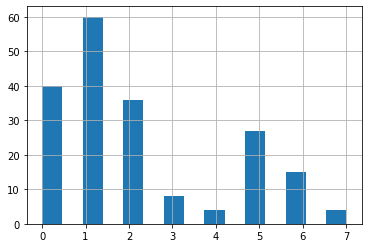

In [31]:
import matplotlib.pyplot as plt
flags["religion"].hist(bins=15)
plt.show()

El histograma muestra que la maoyria de los paises/banderas son cristianos, catolicos y musulmanes.

Ahora tenemos que ver que variables tienen una fuerte correlacion con nuestra variable de interes

In [32]:
correlation_matrix =  flags.corr()
correlation_matrix["religion"]

religion    1.000000
bars       -0.060000
stripes     0.103222
colours    -0.017720
red         0.121721
green       0.128843
blue       -0.154891
gold        0.023334
white      -0.167605
black       0.074055
orange     -0.051215
circles     0.123260
crosses    -0.225238
saltires   -0.133373
quarters   -0.135713
sunstars   -0.075081
crescent    0.053145
triangle    0.056868
icon        0.055714
animate    -0.002741
text       -0.055158
Name: religion, dtype: float64

# **KNN FROM SCRATCH**
Ahora tenemos que definir el "mas cercano" calculando la distancia euclediana

In [33]:
import numpy as np
a = np.array([2,2])
b = np.array([4,4])
np.linalg.norm(a-b)

2.8284271247461903


Para encontrar los vecinos mas cercanos con NumPy, necesitamos definir las distancias de los vectores de las variables independientes, por lo que vamos a pasar nuestros dataframes d epanda a arrays de NumPy

In [34]:
X = flags.drop("religion", axis=1)
X = X.values
y = flags["religion"]
y = y.values

In [35]:
print(X)
print()
print(y)

[[0 3 5 ... 1 0 0]
 [0 0 3 ... 0 1 0]
 [2 0 3 ... 0 0 0]
 ...
 [0 0 4 ... 1 1 0]
 [3 0 4 ... 0 1 0]
 [0 7 5 ... 1 1 0]]

[2 6 2 1 0 5 1 1 0 0 1 0 1 2 2 1 0 1 5 1 3 0 5 0 1 2 6 5 3 5 1 1 0 1 5 5 0
 6 0 2 5 1 0 6 1 6 1 2 1 0 0 2 0 5 1 1 1 1 1 0 0 0 5 5 6 1 5 1 1 1 1 1 0 2
 5 4 0 0 3 6 1 4 2 2 2 0 7 0 5 1 7 2 3 5 1 2 6 2 5 5 2 0 0 1 5 2 2 2 0 1 2
 4 0 1 0 6 1 2 5 1 4 1 1 1 0 2 2 1 6 2 1 2 2 0 5 0 0 0 6 0 0 2 6 5 0 0 2 2
 1 5 3 1 2 1 7 2 0 3 1 1 1 1 2 1 1 1 1 2 3 5 3 7 1 1 2 2 1 1 2 5 1 0 1 1 6
 1 0 0 6 1 6 5 5 5]


Ahora tenemos 2 objetos que contienen nuestra data.
X es la matriz de variables independientes.
y es la matriz de la variable independiente.

Vamos a aplicar KNN con K=3 
Por lo que se crea un nuevo array de NumPy para un dataPoint con los siguientes datos:
*3,0,4,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0*




In [36]:
new_data_point= np.array([
3,0,4,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,
])

Calculamos las distancias entre el nuevo data point y cada uno de los data opint del dataset de banderas

In [37]:
distances = np.linalg.norm(X - new_data_point, axis=1)


Ahora tenemos un vector de distancias, y tenemos que encontrar cuales son nuestros K=3 vecinos mas cercanos. Para hacer esto, necesitamos encontrar los IDs de las distancias minimas. Utilizamos el metodo *argsort()* para ordenar el array de menor a mayor, y tomar los primeros k = 3 elementos para obtener los indices de los K mas cercanos.

In [38]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([112, 192,  88])

Esto nos dice cuales son los 3 vecinos mas cercanos a nuestro nuevo data point.
Ahora necesitamos combinar estos 3 vecinos en una prediccion para nuesto nuvo data point

Primero tenemos que encontrar en que clases se clasifican estos 3 vecinos

In [39]:
nearest_neighbor_flags = y[nearest_neighbor_ids]
nearest_neighbor_flags

array([0, 5, 5])

**Donde 0 = Catholic y 5 = Ethnic**

Ahora que tenemos los valores de las clases de los 3 vecinos, los combinaremos en una sola prediccion, **una para regresion y otra para clasificacion**

# **Promedio para regresion**
En los problemas de regresion, la variable objetivo debe ser un valor numerico, se combinan varios vecinos en una sola prediccion tomando el promedio de sus valores.

In [40]:
prediction = nearest_neighbor_flags.mean()
prediction

3.3333333333333335

La prediccion nos regresa un valor de 3.33...Esto significa que la prediccion para los 3 vecinos mas cercanos para el nuevo datapoint es de **3**


# **Moda para la clasificacion**
En los problemas de clasificacion, la variable objetivo es categorica, en la regresion se utilizaba el promedio para la prediccion, aqui utilizamos la moda.
Podemos calcular la moda utilizando la funcion *mode()* de SciPy

In [41]:
import scipy.stats
class_neighbors = nearest_neighbor_flags
scipy.stats.mode(class_neighbors)

ModeResult(mode=array([5]), count=array([2]))

En base a la moda, la clase que se repite mas veces es la 5, por lo tanto la prediccion nos dice que nuestro nuevo datapoint pertence a la **clase 5 = Ethnic**  

# **Entrenar KNN en python utilizando scikit-learn**

Ahora implementaremos KNN con la libreria de scikit-learn, una de las mas usadas en el area de machine learning.

Se evaluara la calidad del modelo de KNN que hicimos previamente, para hacer la evaluacion se utilizara *train-split*.

Esto divide nuestro dataset en 2 partes:

-**Data para entrenamiento:** para KNN, significa que la data sera utilizada como los vecinos.

-**Data para pruebas:** esta es utilizada para evaluar el modelo.

Podemos divir la data en estos 2 sets utilizando la funcion *train_test_split()* de scikit-learn

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

El *test_size* se reifere al porcentaje del dataset que quieres usar para entrenar y probar

Como esta en 0.2, entonces nuestro porcentaje del dataset para probar sera del 20%, y el 80% restante sera para entrenar.

El *random_state* es un parametro que permite obtener el mismo resultado cada vez que el codigo es ejecutado.

# **Entrenar KNN regresion con scikit-learn**
Para entrenar el modelo de scikit-learn, se cream un modelo de las clases correctas, tambien necesitamos elegir el valor para k.

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

Tenemos nuestro modelo sin entrenar, vamos a entrenar el modelo con el porcentaje del data set que seleccionamos para entrenar. Este modelo utilizara los k=3 vecinos mas cercanos para predecir el valor de algun futuro data point nuevo. 


In [44]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Utilizando la funcion *fit()* permite al modelo "aprender" de la data.  
Ahora el modelo *knn_model* tiene todo lo necesario para hacer predicciones

# **Usando Scikit-learn para inspeccionar el entrenamiento del modelo**

Funciones para evaluar nuestro modelo, hay muchas metricas para evaular la regresion, una de las mas utilizadas es *root mean square error (RMSE)* El RMSE de una prediccion evalua lo siguiente:

1.Calcula la diferencia entre cada valor del data point y el valor predecido.

2.A cada diferencia se le saca la raiz cuadrada.

3.Se suman todas la raices.

4.Se calcula la raiz de la suma de todas las raices.


Se evaluara el margen de error en la prediccion en la data de entrenamiento. 

In [45]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6173344148069677

El RMSE calculado de nuestro modelo *knn_model* fue sobre la data de entrenamiento, ahora sera sobre la data de prueba.

In [46]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.2245714078711765

# **Graficando el entrenamiento del modelo**

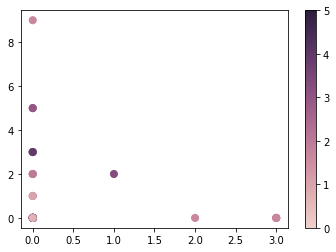

In [47]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()



# **Graficando la prueba del modelo**

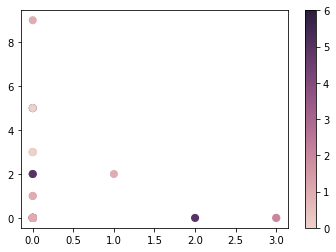

In [48]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

# **Mejorando KNN en python con scikit-learn con GridSearchCV**

Para optimizarlo se utiliza *GridSearchCV*, es una herramienta que se utiliza frecuentemente para mejorar los hyper parametros de los modelos de machine learning. En nuestro caso, nos ayudara a encontrar el mejor valor para K en nuestro dataset.

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
                          

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

Utilizamos GridSearchCV para entrenar de manera repeitda el modelo, el hacerlo de manera repetida da un estaimado confiable para cada uno de los valores de K, en esta caso de prueban valores de 1 a 50.

In [70]:
gridsearch.best_params_

{'n_neighbors': 14}

Al final, este mantendra el valor que tuvo el mejor K de rendimiento para predicciones, en nuestra caso fue **K=14** 

Ahora que sabemos cual es el mejor valor para nuestra K, podemos ver como afecta esto nuesto entrenamiento y pruebas

In [71]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print("Error Entrenamiento ")
print(train_rmse)
print("Error Pruebas ")
print(test_rmse)

Error Entrenamiento 
1.9690913147087974
Error Pruebas 
1.6700645635000175


# **Agregando "Weighted average" de los vecinos en base a su distancia**

Veremos si el rendimiento del modelo mejorara cuando se crea un prediccion utilizando un "Weighted average" en vez del promedio normal. Esto significa que estan mas lejos influenciaran menos en el resultado de la prediccion.

In [72]:
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [73]:
gridsearch.best_params_


{'n_neighbors': 14, 'weights': 'uniform'}

In [80]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

1.6700645635000175

Podemos ver que no hubo una mejora con este dataset, de 1.6700645635000175 con el promedio normal a 1.6700645635000175 utilizando un "weighted average"

# **Mejorando aun mas KNN con scikit-learn con Bagging**
Bagging es un metodo que toma un modelo de machine learning y entrena un gran numero de esos modelos con una ligera variacion en cada entremaiento.

Con scikit-learn creamos un *KNeighborsRegressor* que contiene el mejor valor para K y el "peso" que se calculo con *GridSearchCV*

In [75]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

Importamos la clase BaggingRegressor y creamos una nueva instanca con 100 estimadores utilizando el modelo *bagged_knn* 

In [78]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=14),
                 n_estimators=100)

Ahora podemos hacer una prediccion y calcular el RMSE

In [79]:
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

1.7044394391337336

La margen de error de la prediccion de KNN con Bagged es de 1.70

# **Comparando el RMSE de los cuatro modelos**




*   K arbitraria 1.61
*   GridSearchCV para k 1.67
*   GridSearchCV para k y weights 1.67
*   Bagging y GridSearchCV 1.70




